In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('zoo.csv')
data

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

In [3]:
data.describe()

hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.491512    0.384605    0.407844    0.271410    0.376013   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             legs        tail    domestic     catsize        type  
count  101.000000  101.000000  101.000000  101.000000  101.000000  
mean     2.841584    0.742574    0.128713    0.435644    2.831683  
std      2.033385    0.439397    0.336552    0.498314    2.102709  
min      0.000000    0.000000    0.000000    0.000000    1.000000  
25%      2.000000    0.000000    0.000000    0.000000    1.000000  
50%      4.000000    1.000000    0.000000    0.000000    2.000000  
75%      4.000000    1.000000    0.000000    1.000000    4.000000  
max      8.000000    1.000000    1.000000    1.000000    7.000000

In [4]:
data.duplicated().sum()

0

In [5]:
# dropping animal name column
data.drop(columns = ['animal name'], inplace = True)

In [6]:
data.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [7]:
data.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

<Axes: >

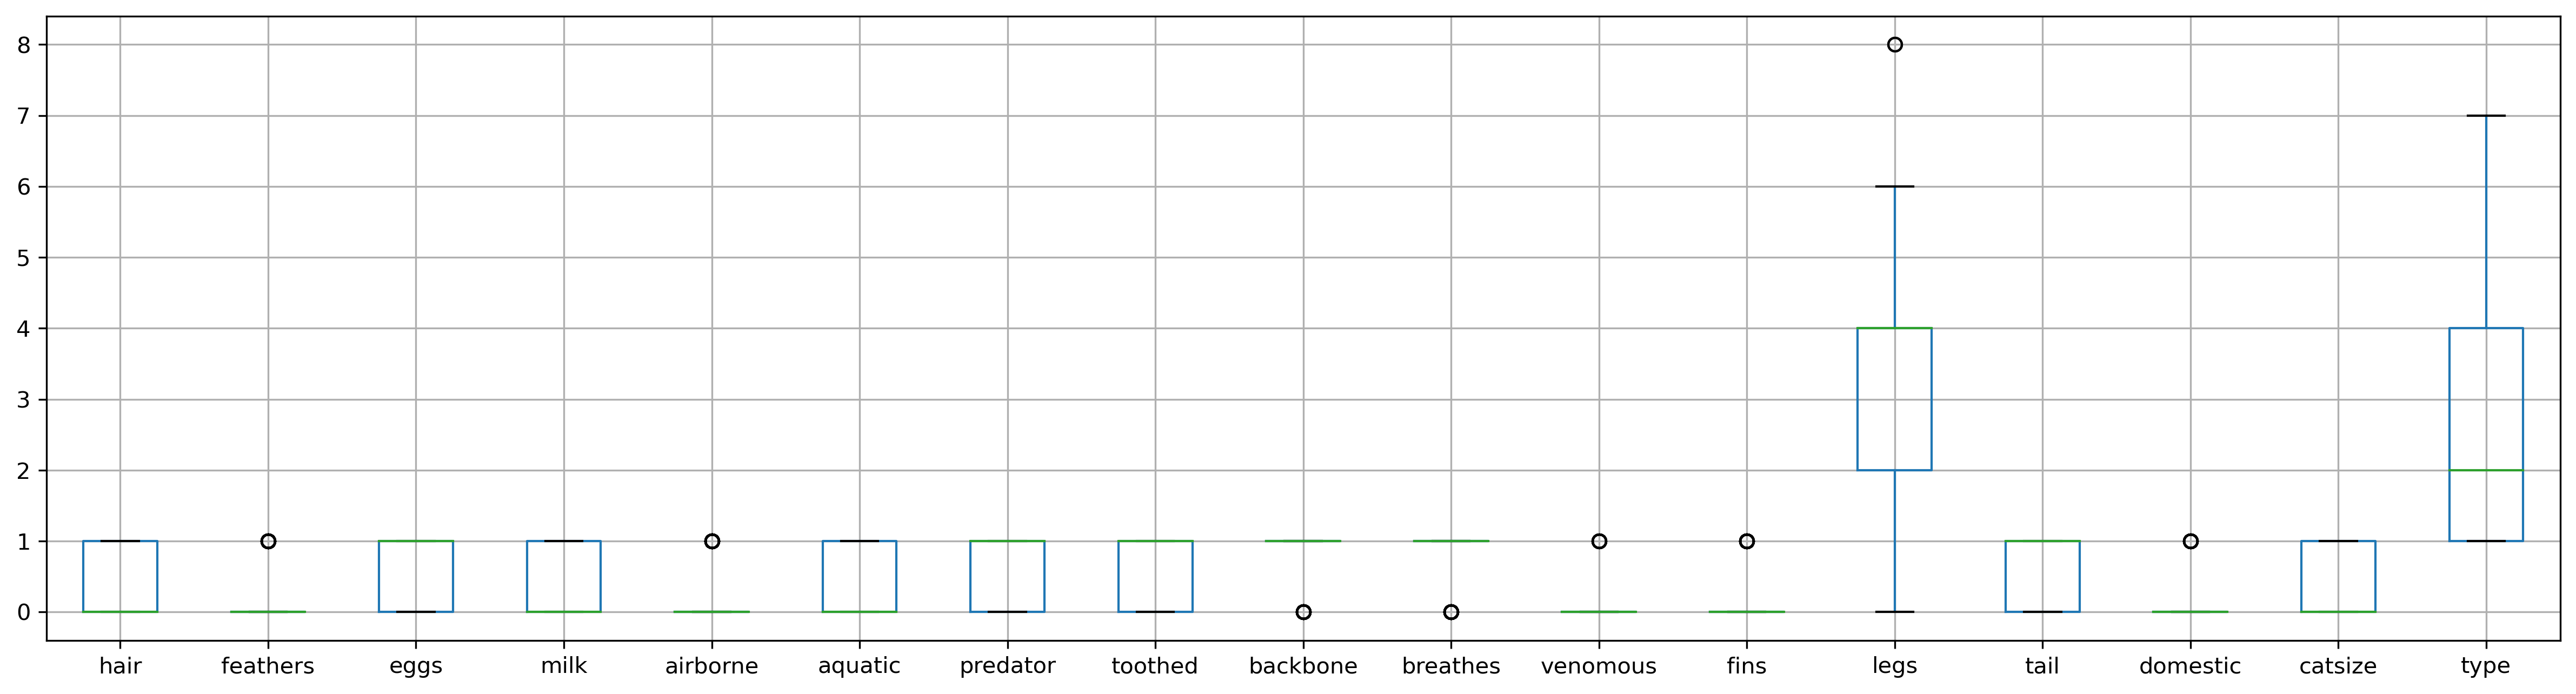

In [8]:
# checking for outliers
data.boxplot()

<Axes: xlabel='legs'>

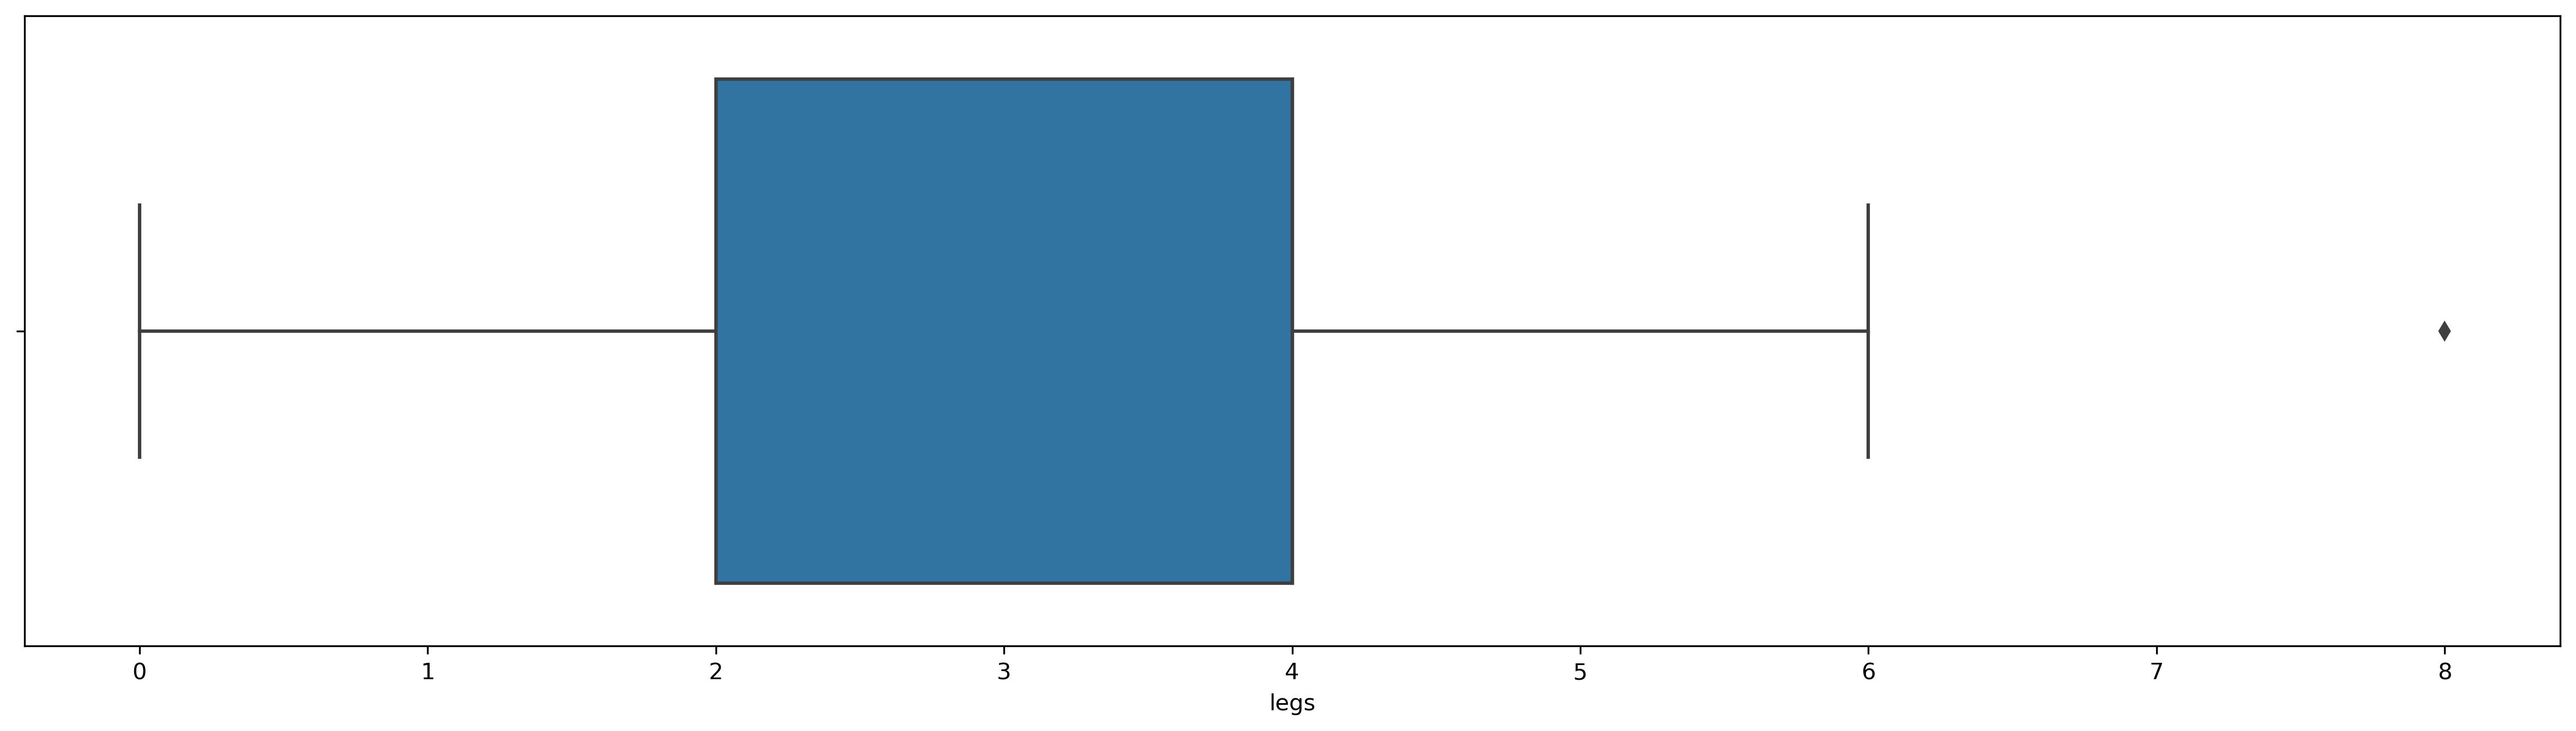

In [9]:
sns.boxplot(x = data['legs'])

In [10]:
# treating outliers in column legs 
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3 - q1

    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)

    return lower_extreme, upper_extreme

In [11]:
outlier_detection(data,'legs')

(-1.0, 7.0)

In [12]:
data.loc[data['legs']>7,'legs'] = 7

<Axes: xlabel='legs'>

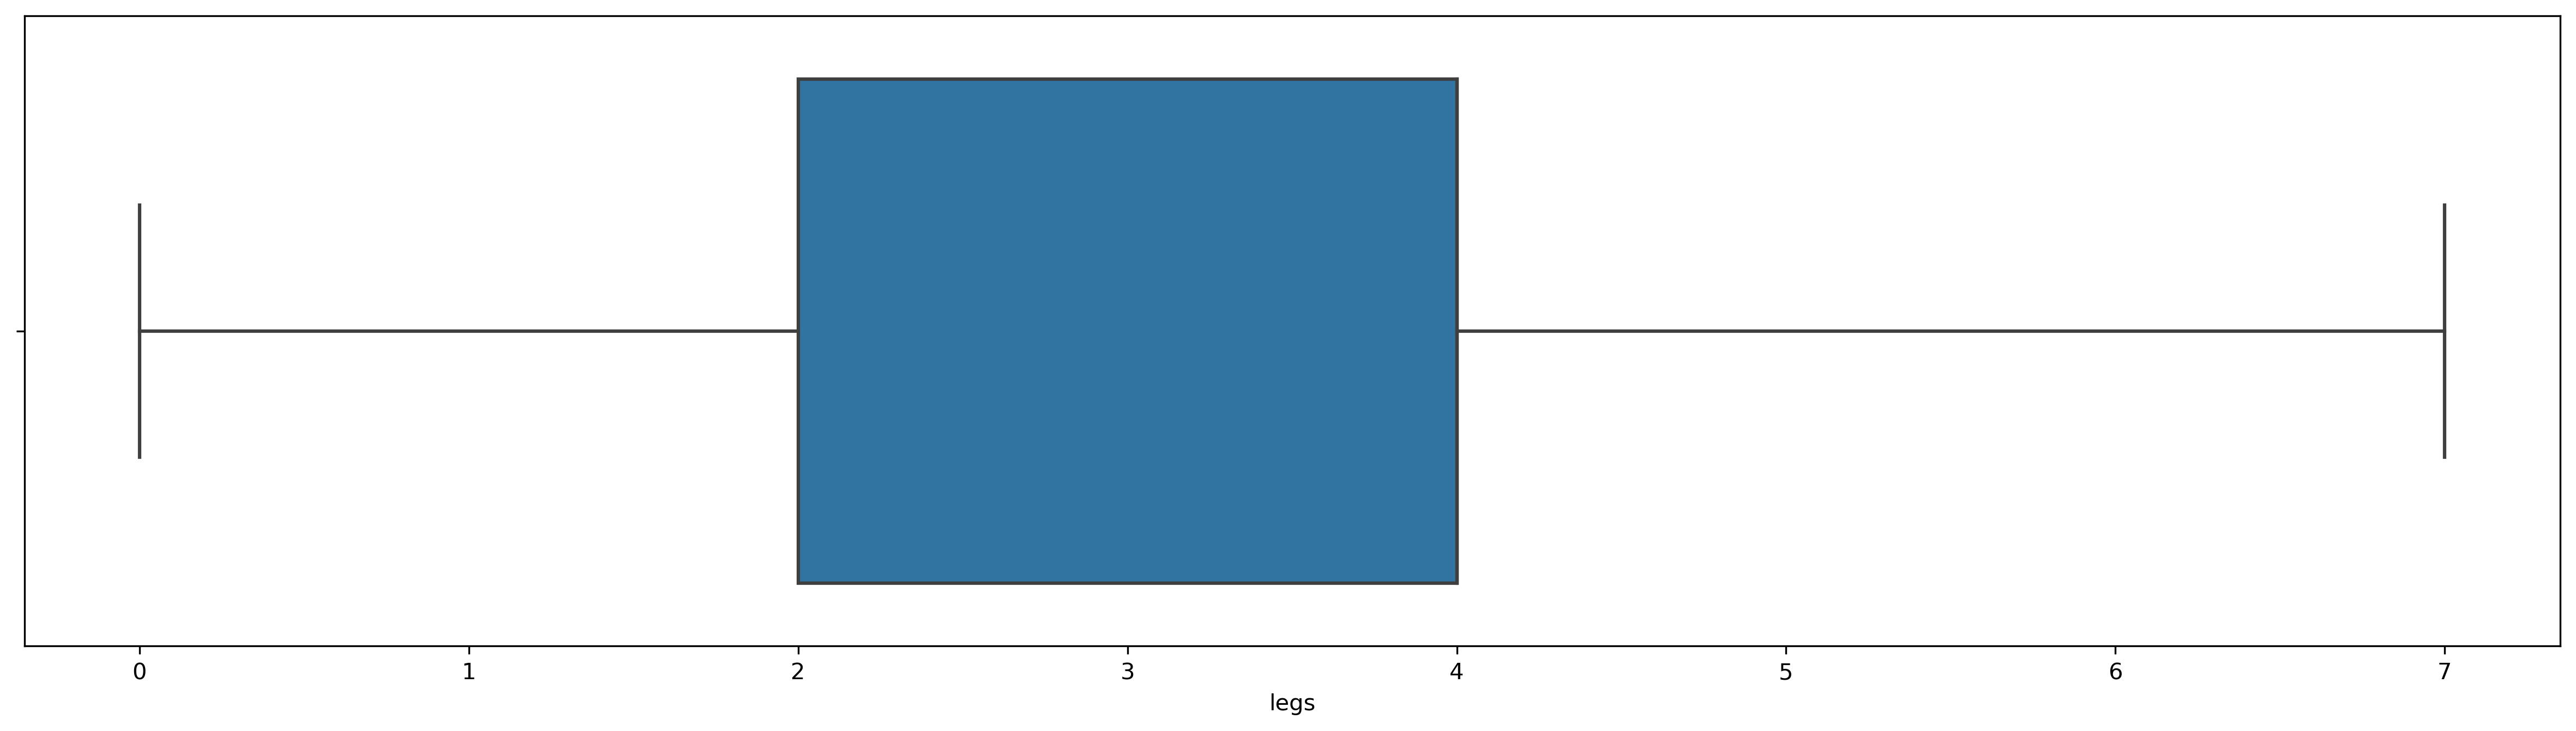

In [13]:
sns.boxplot(x = data['legs'])

<Axes: >

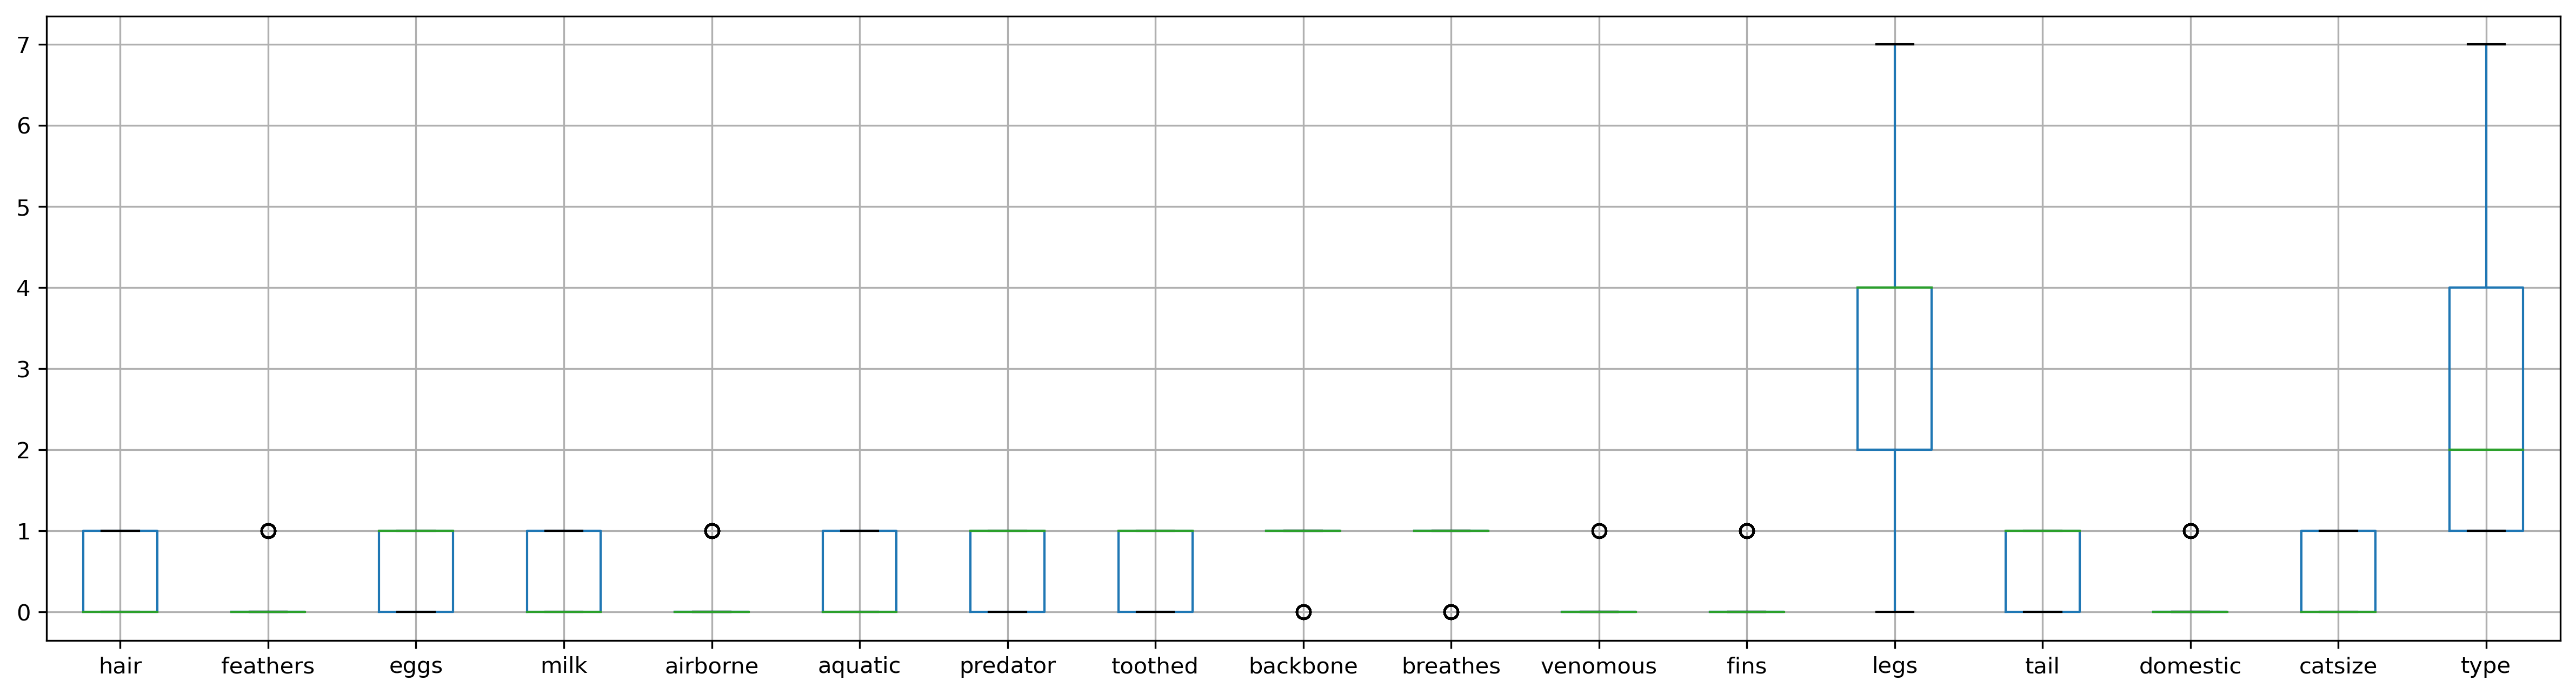

In [14]:
data.boxplot()

In [83]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score, precision_score,f1_score,recall_score

In [29]:
x = data.drop(columns = ['type'])
y = data['type']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [45]:
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [63]:
# for the default distance metric it is Euclidian, let's check for the same 
model = KNeighborsClassifier(n_neighbors=7)

In [64]:
results = cross_val_score(model,x,y,cv=kfold)

In [65]:
print("Accuracy : ",results)
print("Mean Cross-Validation Accuracy :",results.mean())

Accuracy :  [1.  0.7 0.8 1.  1.  1.  0.8 0.5 0.9 0.9]
Mean Cross-Validation Accuracy : 0.86


In [70]:
params = {'metric' : ['manhattan','minkowski'],
          'n_neighbors' : [5,7,9]}

In [71]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model,param_grid = params)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'minkowski'],
                         'n_neighbors': [5, 7, 9]})

In [72]:
print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 5}


In [73]:
# we got best params, we will use them 
model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

In [74]:
results1 = cross_val_score(model,x,y,cv=5)

In [76]:
print(results1.mean())

0.9204761904761904


In [80]:
# fitting the model 
model.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [81]:
y_pred = model.predict(x_test)

In [82]:
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [84]:
# Evaluating 
accuracy_score = accuracy_score(y_test,y_pred)
precision_score = precision_score(y_test,y_pred,average = 'macro')
recall_score = recall_score(y_test,y_pred,average = 'macro')
f1_score = f1_score(y_test,y_pred,average = 'macro')

In [86]:
print(f"Accuary : {accuracy_score}")
print(f"Precision : {precision_score}")
print(f"Recall : {recall_score}")
print(f"F1 Score : {f1_score}")

print(classification_report(y_test,y_pred))

Accuary : 0.9523809523809523
Precision : 0.7777777777777777
Recall : 0.8333333333333334
F1 Score : 0.7999999999999999
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [94]:
# visualizing decision boundaries
X_vis = data.iloc[:, :2].values  
Y = data['type']  
model.fit(X_vis, Y)
xx, yy = np.meshgrid(np.linspace(X_vis[:, 0].min()-1, X_vis[:, 0].max()+1, 100),
                     np.linspace(X_vis[:, 1].min()-1, X_vis[:, 1].max()+1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

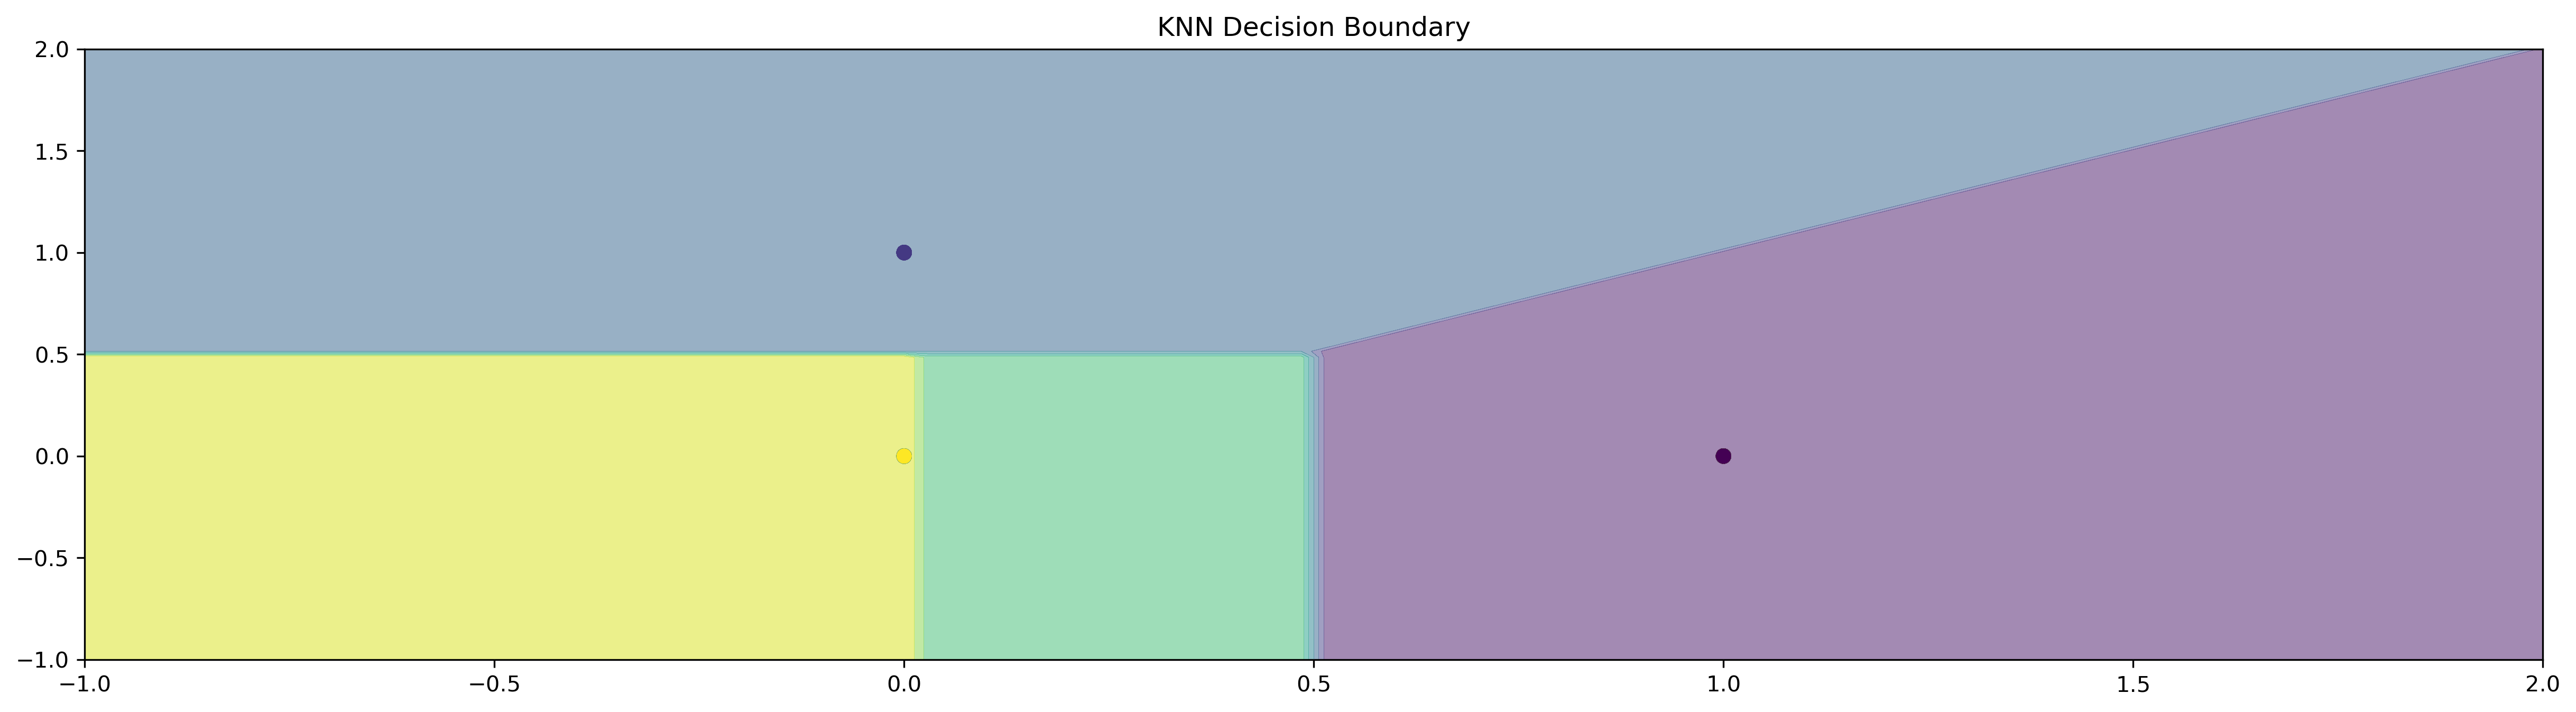

In [95]:
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=Y)
plt.title("KNN Decision Boundary")
plt.show()

#### Interview Questions

In [ ]:
'''
1. What are the key hyperparameters in KNN?
-> Key Hyperparameters in KNN: The most important hyperparameters in KNN include n_neighbors (the number of nearest neighbors 
   to consider), weights (which can be uniform or distance-based to influence how neighbors contribute to the prediction), 
   and algorithm (the method used to compute nearest neighbors, such as brute force or KD-tree).
   
2. What distance metrics can be used in KNN?
-> Common distance metrics for KNN include Euclidean distance (the most widely used), Manhattan distance (suitable for 
   grid-like data), and Minkowski distance (a generalization of both Euclidean and Manhattan). Other metrics like Hamming 
   distance can also be used for categorical data.
'''